# HSC Board Challenge Changed Result Data Preprocessing
### Task
- Sanity Check
    - Standardize columns name
    - Duplicate
    - Standardize values
- EDA
    - Histogram
    - Boxplot
    - Scatterplot
- Handling Missing Value
- Data Transformation

In [30]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

In [2]:
# reading file
file = Path("../files/HSC_changed_result19.xlsx")
df = pd.read_excel(file)

In [3]:
# check if data is loaded
df.head()

,SL_NO,C_CODE,ROLL_NO,SUBJECT NAME,PREVIOUS GP,CURRENT GP,PREVIOUS GPA,CURRENT GPA
0,1.0,460,100071,PHYSICS,A,A+,4.25,4.42
1,2.0,460,100101,ENGLISH,A,A+,5.00,5.00
2,3.0,460,100308,PHYSICS,A,A+,5.00,5.00
3,4.0,460,100401,INFORMATION & COMMUNICATION\nTECHNOLOGY,A,A+,4.67,4.83
4,5.0,460,100416,CHEMISTRY,A,A+,5.00,5.00


In [4]:
# displaying full dataset
pd.set_option('display.max_rows', None)
df

,SL_NO,C_CODE,ROLL_NO,SUBJECT NAME,PREVIOUS GP,CURRENT GP,PREVIOUS GPA,CURRENT GPA
0,1.0,460,100071,PHYSICS,A,A+,4.25,4.42
1,2.0,460,100101,ENGLISH,A,A+,5.00,5.00
2,3.0,460,100308,PHYSICS,A,A+,5.00,5.00
3,4.0,460,100401,INFORMATION & COMMUNICATION\nTECHNOLOGY,A,A+,4.67,4.83
4,5.0,460,100416,CHEMISTRY,A,A+,5.00,5.00
5,6.0,460,100496,ENGLISH,A,A+,4.83,5.00
6,7.0,460,100542,HIGHER MATHEMATICS,A,A+,4.83,5.00
7,8.0,460,100630,PHYSICS,A-,A,4.33,4.42
8,9.0,460,100632,ENGLISH,A-,A,4.58,4.67
9,10.0,460,100696,BANGLA,A-,A,4.33,4.42


## Sanity Check

* **Standardizing Columns Name**

In [5]:
# columns review
df.columns

Index(['SL_NO', 'C_CODE', 'ROLL_NO', 'SUBJECT    NAME', 'PREVIOUS GP',
       'CURRENT GP', 'PREVIOUS GPA', 'CURRENT GPA'],
      dtype='object')

In [6]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SL_NO            1554 non-null   float64
 1   C_CODE           1586 non-null   int64  
 2   ROLL_NO          1586 non-null   int64  
 3   SUBJECT    NAME  1586 non-null   object 
 4   PREVIOUS GP      1586 non-null   object 
 5   CURRENT GP       1586 non-null   object 
 6   PREVIOUS GPA     1197 non-null   float64
 7   CURRENT GPA      1504 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 99.2+ KB


In [7]:
# check Duplicates
df.duplicated().sum()

0

In [8]:
# check null values
df.isnull().any()

SL_NO               True
C_CODE             False
ROLL_NO            False
SUBJECT    NAME    False
PREVIOUS GP        False
CURRENT GP         False
PREVIOUS GPA        True
CURRENT GPA         True
dtype: bool

**Since the Sl No has null values, so the dataset is not serialized properly. We can reset the index and then consider this as Sl No.**

In [9]:
# resetting index
df = df.reset_index()

In [10]:
# droping existing Sl No columns
df.drop("SL_NO", axis=1, inplace=True)

In [11]:
# standardizing column names to get easy access
df.columns = df.columns.str.replace(r"_|\s{2,}", " ").str.title()

In [12]:
# fixing abbreviation in columns  name
# Using str.replace with regex
df.columns = df.columns.str.replace(r'Index|Gp\b|Gpa\b', lambda x: {
    'index': 'Sl No',
    'gp': 'GP',
    'gpa': 'GPA',
}[x.group().lower()], regex=True)

In [13]:
# checking column header update
df.columns

Index(['Sl No', 'C Code', 'Roll No', 'Subject Name', 'Previous GP',
       'Current GP', 'Previous GPA', 'Current GPA'],
      dtype='object')

**NOTE:**
- ***x.group().lower():*** Converts the match to lowercase, ensuring consistent mapping in the replacement dictionary.
- ***\b (word boundary):*** Ensures "Gp" and "Gpa" are only replaced when they appeared as whole words.

* **Standardizing Columns Value**

In [14]:
# getting subject names
df["Subject Name"].unique()

array(['PHYSICS', 'ENGLISH', 'INFORMATION & COMMUNICATION\nTECHNOLOGY',
       'CHEMISTRY', 'HIGHER MATHEMATICS', 'BANGLA',
       'INFORMATION &\nCOMMUNICATION TECHNOLOGY', 'BIOLOGY', 'STATISTICS',
       'GEOGRAPHY', 'SOCIAL WORK', 'CIVICS & GOOD\nGOVERNANCE',
       'ECONOMICS', 'STUDIES OF ISLAM', 'SOCIOLOGY', 'HISTORY',
       'PSYCHOLOGY', 'ISLAMIC HISTORY &\nCULTURE', 'AGRICULTURE STUDIES',
       'FINANCE, BANKING &\nINSURANCE',
       'PRODUCTION\nMANAGEMENT & MARKETING', 'ACCOUNTING',
       'BUSINESS\nORGANIZATION & MANAGEMENT',
       'BUSINESS ORGANIZATION &\nMANAGEMENT',
       'PRODUCTION MANAGEMENT &\nMARKETING', 'FOOD & NUTRITION'],
      dtype=object)

In [15]:
# remove the newline characters from subject name
df["Subject Name"] = df["Subject Name"].str.replace('\n', ' ')

In [16]:
# create abbreviations of subject name
# Using str.replace with regex
df["Subject Name"] = df["Subject Name"].str.replace(r'INFORMATION & COMMUNICATION TECHNOLOGY|CIVICS & GOOD GOVERNANCE|ISLAMIC HISTORY & CULTURE|FINANCE, BANKING & INSURANCE|PRODUCTION MANAGEMENT & MARKETING|BUSINESS ORGANIZATION & MANAGEMENT', lambda x: {
    'INFORMATION & COMMUNICATION TECHNOLOGY': 'ICT',
    'CIVICS & GOOD GOVERNANCE': 'CGG',
    'ISLAMIC HISTORY & CULTURE': 'ISLAMIC HISTORY',
    'FINANCE, BANKING & INSURANCE': "FINANCE",
    'PRODUCTION MANAGEMENT & MARKETING': 'PRODUCTION MANAGEMENT',
    'BUSINESS ORGANIZATION & MANAGEMENT': 'BUSINESS ORGANIZATION'

}[x.group()], regex=True)

In [17]:
# check updates
df["Subject Name"].unique()

array(['PHYSICS', 'ENGLISH', 'ICT', 'CHEMISTRY', 'HIGHER MATHEMATICS',
       'BANGLA', 'BIOLOGY', 'STATISTICS', 'GEOGRAPHY', 'SOCIAL WORK',
       'CGG', 'ECONOMICS', 'STUDIES OF ISLAM', 'SOCIOLOGY', 'HISTORY',
       'PSYCHOLOGY', 'ISLAMIC HISTORY', 'AGRICULTURE STUDIES', 'FINANCE',
       'PRODUCTION MANAGEMENT', 'ACCOUNTING', 'BUSINESS ORGANIZATION',
       'FOOD & NUTRITION'], dtype=object)

## Exploratory Data Analysis

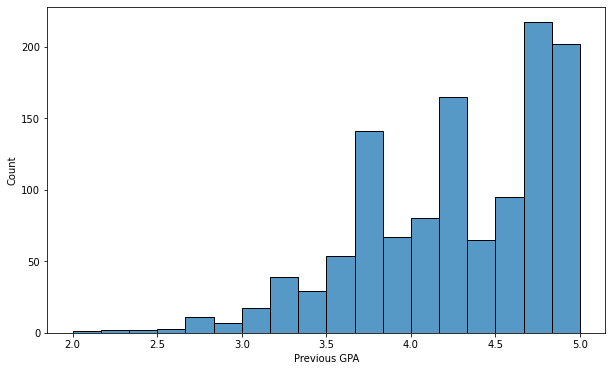

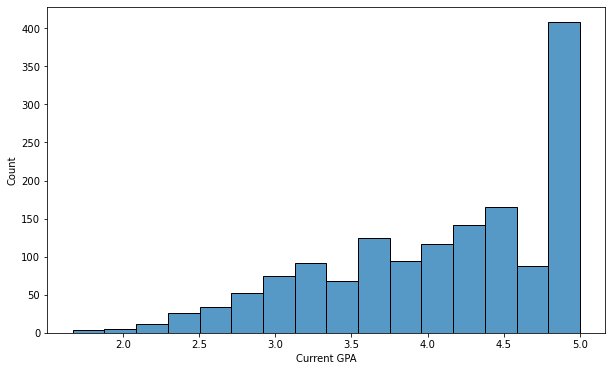

In [18]:
# histogram for data distribution
for i in ["Previous GPA", "Current GPA"]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=i)
    plt.show()

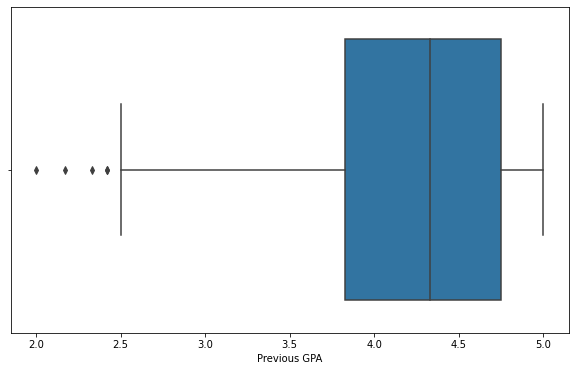

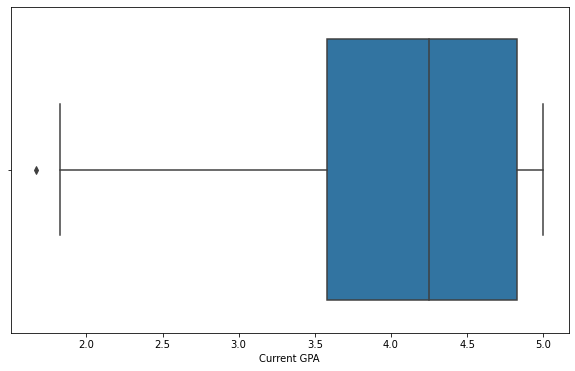

In [19]:
# boxplot for outliers check
for i in ["Previous GPA", "Current GPA"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=i)
    plt.show()

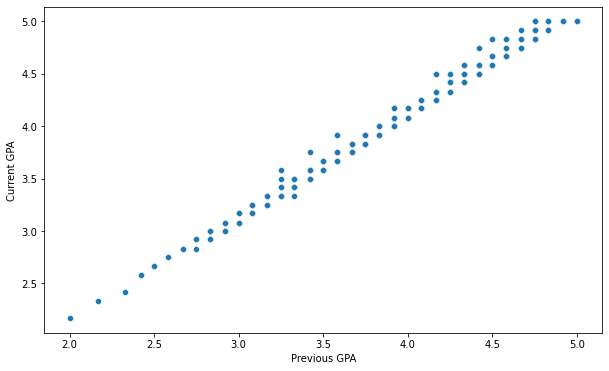

In [20]:
# scatter plot to understand the relation between previous and current GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous GPA', y='Current GPA')
plt.show()

* **Handling nulls in columns**

Though the GP changed according to challenged subject but the Previous and Current GPA dependent on the average GPA of all subjects. If the Current GPA is NaN even after changing the GP, means the overall result is not changed and apeared fail. So we can fill the NaN values as GPA 0.0

In [21]:
# filling the missing GPA
df.fillna(0.0, inplace=True)

In [22]:
# checking NaN status
df.isnull().any()

Sl No           False
C Code          False
Roll No         False
Subject Name    False
Previous GP     False
Current GP      False
Previous GPA    False
Current GPA     False
dtype: bool

**NOTE:** Since the results are not outside the norm, we do not need to handle outliers in this case

## Data Transformation

In [23]:
# Define a function to categorize subjects
def Category(sub):
    if sub in ['PHYSICS', 'CHEMISTRY', 'BIOLOGY', 'HIGHER MATHEMATICS', 'FOOD & NUTRITION']:
        return 'Science'
    elif sub in ['ECONOMICS', 'FINANCE', 'PRODUCTION MANAGEMENT', 'STATISTICS', 'ACCOUNTING', 'BUSINESS ORGANIZATION']:
        return 'Business Studies'
    elif sub in ['GEOGRAPHY', 'SOCIAL WORK', 'STUDIES OF ISLAM', 'SOCIOLOGY', 'HISTORY', 'PSYCHOLOGY', 'AGRICULTURE STUDIES', 'ISLAMIC HISTORY']:
        return 'Arts'
    else:
        return 'Compulsory'

In [24]:
df['Groups'] = df["Subject Name"].apply(Category)

In [25]:
# fail conversion
df["Fail Coversion"] = (df["Previous GPA"] == 0) & (df["Current GPA"] != 0)

In [26]:
df

,Sl No,C Code,Roll No,Subject Name,Previous GP,Current GP,Previous GPA,Current GPA,Groups,Fail Coversion
0,0,460,100071,PHYSICS,A,A+,4.25,4.42,Science,False
1,1,460,100101,ENGLISH,A,A+,5.00,5.00,Compulsory,False
2,2,460,100308,PHYSICS,A,A+,5.00,5.00,Science,False
3,3,460,100401,ICT,A,A+,4.67,4.83,Compulsory,False
4,4,460,100416,CHEMISTRY,A,A+,5.00,5.00,Science,False
5,5,460,100496,ENGLISH,A,A+,4.83,5.00,Compulsory,False
6,6,460,100542,HIGHER MATHEMATICS,A,A+,4.83,5.00,Science,False
7,7,460,100630,PHYSICS,A-,A,4.33,4.42,Science,False
8,8,460,100632,ENGLISH,A-,A,4.58,4.67,Compulsory,False
9,9,460,100696,BANGLA,A-,A,4.33,4.42,Compulsory,False


In [27]:
# saving files
df.to_excel('Transformed_HSC_changed_result19.xlsx', index=False)

## This NoteBook is created by Tshihab07, Dept. of Computer Science and Engineering